In [22]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from dateutil.relativedelta import relativedelta # 日期数据处理
from scipy.optimize import minimize              # 优化函数

import statsmodels.formula.api as smf            # 数理统计
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # 一些有用的函数
from tqdm import tqdm_notebook

import warnings                                  # 勿扰模式
warnings.filterwarnings('ignore')


In [17]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
data=pd.read_csv("C:\\Users\\Administrator\\Desktop\\电费\\data2.csv",sep=',')

In [3]:
data0=pd.Series(data['snum'].values, index=pd.date_range('2018-11-01', freq='D',periods=len(data["snum"])))

In [8]:
data1=data0.resample('M',label='right').mean()
print(data1,type(data1))

2018-11-30    385.419688
2018-12-31    370.358471
2019-01-31    418.628438
2019-02-28    360.551037
2019-03-31    325.716817
2019-04-30    353.233783
2019-05-31    309.501499
2019-06-30    282.079256
2019-07-31    313.083738
2019-08-31    318.805333
2019-09-30    305.563030
2019-10-31    305.472153
2019-11-30    344.346611
2019-12-31    394.258368
2020-01-31    328.846155
2020-02-29    323.971038
2020-03-31    333.669245
2020-04-30    328.775181
2020-05-31    326.536471
2020-06-30    314.519335
2020-07-31    284.745523
2020-08-31    278.801281
2020-09-30    324.930203
2020-10-31    305.625085
2020-11-30    347.219967
2020-12-31    377.719115
2021-01-31    386.114904
2021-02-28    370.019764
2021-03-31    343.373658
2021-04-30    339.097488
2021-05-31    316.415030
2021-06-30    342.766033
Freq: M, dtype: float64 <class 'pandas.core.series.Series'>


In [7]:
data2=data0.resample('BM',label='right').mean()
print(data2,type(data2))

2018-11-30    385.419688
2018-12-31    370.358471
2019-01-31    418.628438
2019-02-28    360.551037
2019-03-29    345.707885
2019-04-30    333.397067
2019-05-31    309.501499
2019-06-28    300.126387
2019-07-31    295.891961
2019-08-30    325.834326
2019-09-30    299.187949
2019-10-31    305.472153
2019-11-29    354.859697
2019-12-31    383.171142
2020-01-31    328.846155
2020-02-28    333.607163
2020-03-31    324.934567
2020-04-30    328.775181
2020-05-29    346.678151
2020-06-30    297.017008
2020-07-31    284.745523
2020-08-31    278.801281
2020-09-30    324.930203
2020-10-30    314.378651
2020-11-30    337.407004
2020-12-31    377.719115
2021-01-29    403.587144
2021-02-26    376.906148
2021-03-31    324.766651
2021-04-30    339.097488
2021-05-31    316.415030
2021-06-30    342.766033
Freq: BM, dtype: float64 <class 'pandas.core.series.Series'>


In [9]:
print(data1.values-data2.values)

[  0.           0.           0.           0.         -19.99106859
  19.83671632   0.         -18.04713123  17.19177693  -7.02899314
   6.37508035   0.         -10.5130859   11.0872265    0.
  -9.63612498   8.73467832   0.         -20.14168074  17.50232721
   0.           0.           0.          -8.7535659    9.8129632
   0.         -17.47224048  -6.88638389  18.60700702   0.
   0.           0.        ]


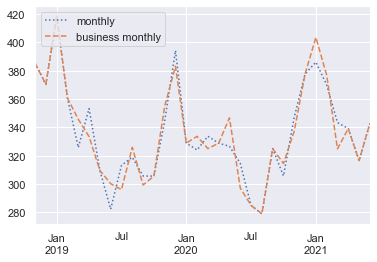

In [16]:
data1.plot(style=':')
data2.plot(style='--')
plt.legend(['monthly','business monthly'],loc='upper left')

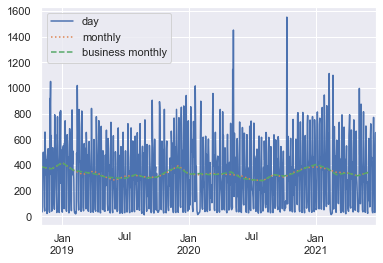

In [15]:
data0.plot(style='-')
data1.plot(style=':')
data2.plot(style='--')
plt.legend(['day','monthly','business monthly'],loc='upper left')

In [ ]:
data1.to_csv("C:\\Users\\Administrator\\Desktop\\电费\\monthly.csv",sep=',')

In [23]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 16 must be < 16.

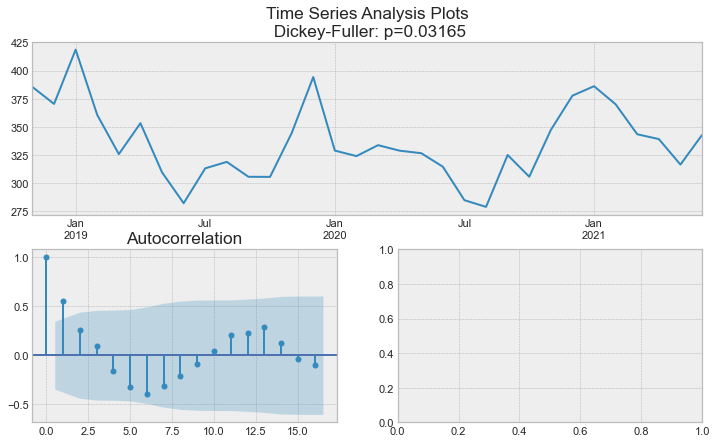

In [28]:
tsplot(data1)